## Forest Cover Type- Support Vector Machine Algorithm

In this notebook, we work with SVM. SVM is a simple machine learning algorithm that is used for classification. It is widely used as it produces significant accuracy with less computation power. 

First, some data preprocessing.

In [ ]:
#import all relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [5]:
#reading the file
df = pd.read_csv(r'C:\Users\aishw\Downloads\DataScience\Final Project\Info 6105 Final Project_v2\Info 6105 Final Project\Dataset\covtype.csv',index_col=None)
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


Data Cleaning

In [6]:
#droping the columns with low standard deviation/high skewness as performed above
remaining=['Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15',
     'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37']
#removing all above columns with low standard deviation as it will not impact our dependent variable
df.drop(remaining, axis=1, inplace=True)
# we will also remove Hillshade_3pm because of highly neagtive -0.78 co-related value
df.drop('Hillshade_3pm',axis=1, inplace=True)
#Final Data Set after cleaning
#df.info()

Data Modeling

In [7]:
X=df.loc[:,'Elevation':'Soil_Type40']
y=df['Cover_Type']
#Splitting the data into  train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

### Support Vector Machine Algorithm

Support Vector Machine (SVM) is a supervised machine learning algorithm capable of performing classification. The linear SVM classifier works by drawing a straight line between classes. All the data points that fall on one side of the line will be labeled as one class and all the points that fall on the other side will be labeled as the second.

The LSVM algorithm will select a line that not only separates the two classes but stays as far away from the closest samples as possible. In fact, the “support vector” in “support vector machine” refers to two position vectors drawn from the origin to the points which dictate the decision boundary.

In [8]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [9]:
svc = LinearSVC()

#Training the model
svc.fit(X_train, y_train)

C:\Users\aishw\Anaconda3_2\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Confusion Matrix:
[[36212  2496     2    28     0  3278     0]
 [23749 19773   202   199     0 12892     0]
 [    2   408  3176     0     0  3641     0]
 [    0     0   324     0     0   239     0]
 [  269  1107    28     0     0   492     0]
 [   58   369   552     0     0  2526     0]
 [ 4010    22    20     0     0   129     0]]


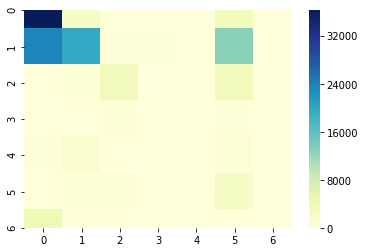

In [11]:
y_pred = svc.predict(X_test)

#Plotting the prediction on a confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
CM = confusion_matrix(y_test, y_pred)
print(CM)
sns.heatmap(CM,cmap="YlGnBu")
plt.show()

In [10]:
from sklearn.metrics import accuracy_score

# get the accuracy
accuracy_score(y_test, y_pred)

0.5466296050876484

### Inference

The algorithm works well with a small dataset with clear margins of separation. Looking at the confusion matrix, the inference is that the classification has not been very successful. This is reflected in the low accuracy.

This just goes on to say that we need to pick an algorithm that is capable of classifying complex datasets.